In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os

In [2]:
# Load data
path = os.path.join("..", "data", "csvresults", "atari_meta.csv")
df = pd.read_csv(path)
df = df.drop('Unnamed: 0', axis=1).set_index("game")
df = df.drop(["Tennis", "Venture", "MontezumaRevenge"])
df.head()

,reg_loss,reg_mse,reg_mae,reg_val_loss,reg_val_mse,reg_val_mae,hlg_mse,hlg_mae,hlg_loss,hlg_val_mse,hlg_val_mae,hlg_val_loss,y_sd,reg_sd,hlg_sd,kl_mean,kl_sd,hist_sd
game,,,,,,,,,,,,,,,,,,
AirRaid,0.008682,0.008682,0.067155,0.010074,0.010074,0.059409,0.008873,0.068780,3.126328,0.008873,0.068190,3.125896,0.136130,0.00000,0.000000,1.354709,1.336799,0.096615
Alien,0.000827,0.000827,0.008731,0.000716,0.000716,0.008891,0.000843,0.007925,2.243576,0.000709,0.008230,2.240457,0.002764,0.00000,0.000692,0.034985,0.007338,0.040571
Amidar,0.000378,0.000378,0.007455,0.000627,0.000627,0.009036,0.000245,0.004485,2.171497,0.001080,0.012648,2.403203,0.011969,0.01614,0.013054,1.802306,2.315752,0.028396
Assault,0.000014,0.000014,0.000053,0.000021,0.000021,0.000043,0.000014,0.000040,2.125762,0.000021,0.000046,2.124676,0.000000,0.00000,0.000000,0.000075,0.000000,0.024049
Asterix,0.000210,0.000210,0.001097,0.000207,0.000207,0.001159,0.000085,0.000581,2.128017,0.000098,0.000816,2.125485,0.000045,0.00000,0.000057,5.000000,0.000000,0.024059


In [28]:
# Select variable to test for mean zero

#Y = (df["hlg_val_mae"].to_numpy() / df["reg_val_mae"].to_numpy()) - 1
#Y = np.sqrt(df["hlg_val_mse"].to_numpy()) / np.sqrt(df["reg_val_mse"].to_numpy()) - 1
#Y = np.log(df["hlg_val_mae"].to_numpy() / df["reg_val_mae"].to_numpy())
#Y = np.log(np.sqrt(df["hlg_val_mse"].to_numpy()) / np.sqrt(df["reg_val_mse"].to_numpy()))
Y = np.sqrt(df["hlg_val_mse"].to_numpy()) - np.sqrt(df["reg_val_mse"].to_numpy())
#Y = df["hlg_val_mae"].to_numpy() - df["reg_val_mae"].to_numpy()
Y

array([ 8.78090411e-03, -6.61036000e-04,  3.61257698e-03,  3.23836866e-06,
       -3.43361404e-04, -1.21078491e-02, -6.24767318e-03,  8.03676347e-04,
       -3.40523757e-03, -2.86104158e-03,  7.03262538e-03, -8.34608078e-03,
        3.14685479e-02, -4.11722809e-04, -4.74352762e-03,  4.02819552e-03,
       -6.78434223e-03, -9.21037048e-03, -4.62008466e-04, -3.46580148e-03,
       -9.37956572e-03,  2.52170861e-03,  1.86404586e-03, -2.41841860e-02,
       -8.47658515e-03,  3.79822776e-03,  1.83337834e-04, -1.42533798e-03,
       -6.20270520e-03, -5.32004759e-02, -1.88062061e-03, -2.36147768e-02,
        9.04996705e-06, -1.57974381e-03, -3.49556736e-04, -4.30286294e-03,
       -6.23123662e-04, -2.37941742e-04, -2.59153917e-03, -4.37239558e-03,
        1.20650604e-03, -3.84209668e-02,  4.72608488e-04, -7.37407990e-03,
        6.76741824e-03,  1.88715756e-04, -5.49200177e-02,  3.34545970e-04,
       -2.00742111e-03,  3.70703638e-05, -6.48241676e-03, -1.80515796e-02,
       -3.41333635e-03, -

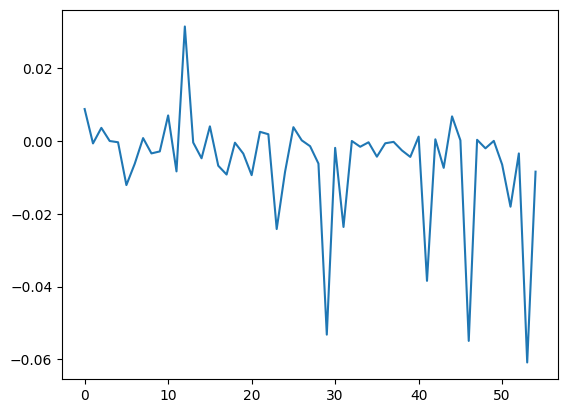

In [29]:
# Plot Y
plt.plot(Y)
plt.show()

In [30]:
# Compute estimated mean, standard error, test statistic
n = len(Y)
b_hat = np.mean(Y)
se_b = np.std(Y, ddof=1) / np.sqrt(n)
t = b_hat / se_b
b_hat, se_b, t

(-0.005969087270469482, 0.002062031248881125, -2.8947608207724094)

In [31]:
# Compute confidence interval
alpha = 0.05
t_star = stats.t.ppf(1 - alpha / 2, n - 1)
low = b_hat - t_star * se_b
high = b_hat + t_star * se_b

low, high

(-0.010103211009604148, -0.0018349635313348166)

In [32]:
# Compute one-sided p-value
p_val = stats.t.cdf(-abs(t), n - 1)
p_val

0.0027323739743756997